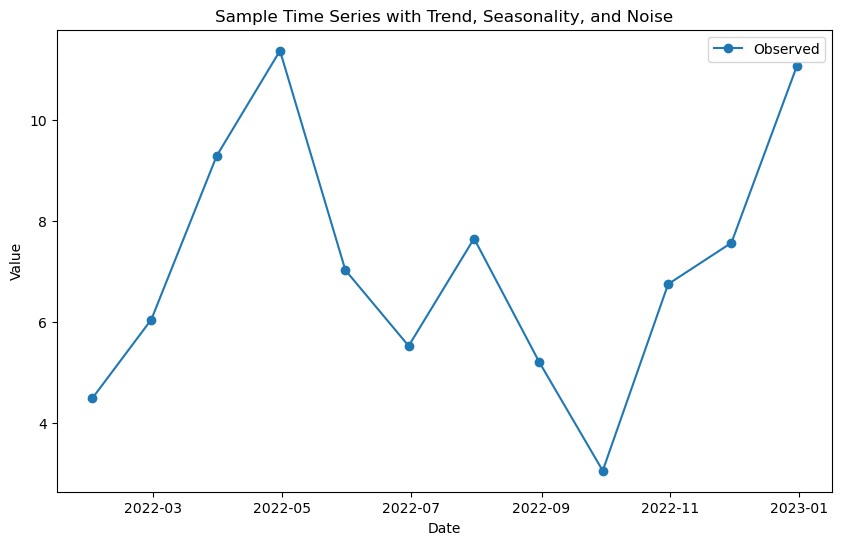

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a time index (e.g., monthly data for a year)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M')

# Create a trend component with a slight increase over time
trend = np.arange(1, len(date_rng) + 1)

# Create a seasonal component with a sinusoidal pattern
seasonality = 5 * np.sin(2 * np.pi * np.arange(1, len(date_rng) + 1) / 12)

# Create some random noise
noise = np.random.normal(loc=0, scale=2, size=len(date_rng))

# Combine the components to create the observed time series
observed_data = trend + seasonality + noise

# Create a DataFrame with the date index and observed data
df = pd.DataFrame(index=date_rng, data={'Observed': observed_data})

# Plot the observed time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.title('Sample 3333Time Series with Trend, Seasonality, and Noise')
plt.xlabel('Date')
plt.ylabel('Value')



plt.legend()
plt.show()





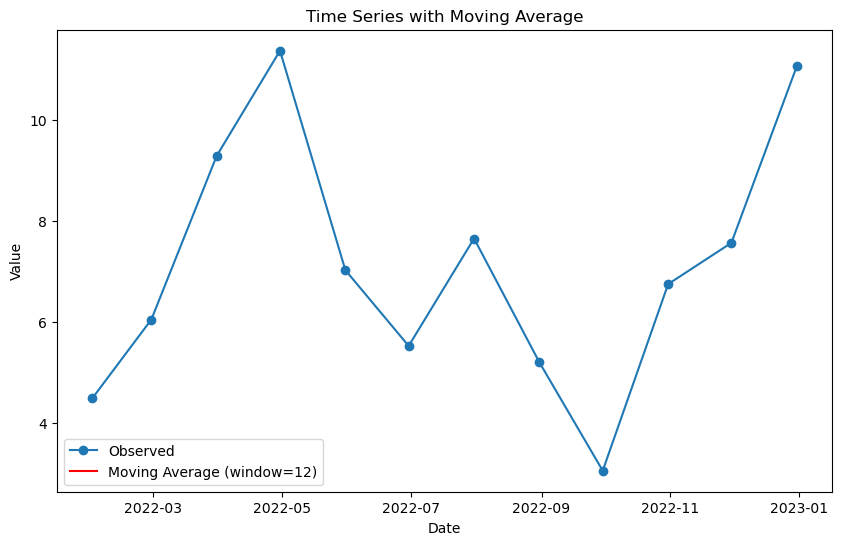

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming 'df' is your DataFrame with time index)
# df = pd.read_csv('your_dataset.csv', parse_dates=True, index_col='Date')

# Set the window size for the moving average
window_size = 12  # You can adjust this value

# Calculate the moving average using pandas rolling mean
df['SMA'] = df['Observed'].rolling(window=window_size).mean()

# Plot the original time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.plot(df.index, df['SMA'], label=f'Moving Average (window={window_size})', color='red')
plt.title('Time Series with Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

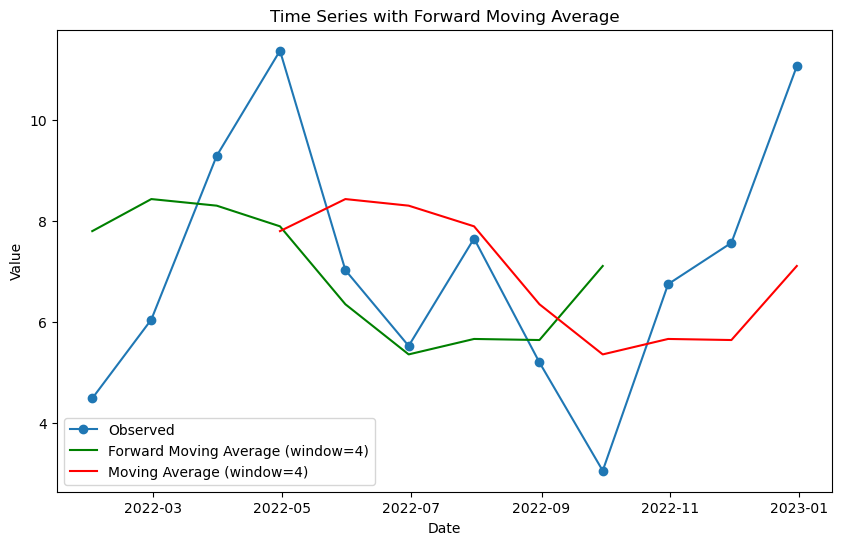

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming 'df' is your DataFrame with time index)
# df = pd.read_csv('your_dataset.csv', parse_dates=True, index_col='Date')

# Set the window size for the forward moving average
window_size = 4  # You can adjust this value

# Calculate the forward moving average
df['Forward_MA'] = df['Observed'].rolling(window=window_size).mean().shift(-window_size + 1)
df['SMA'] = df['Observed'].rolling(window=window_size).mean()

# Plot the original time series and the forward moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.plot(df.index, df['Forward_MA'], label=f'Forward Moving Average (window={window_size})', color='green')
plt.plot(df.index, df['SMA'], label=f'Moving Average (window={window_size})', color='red')

plt.title('Time Series with Forward Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

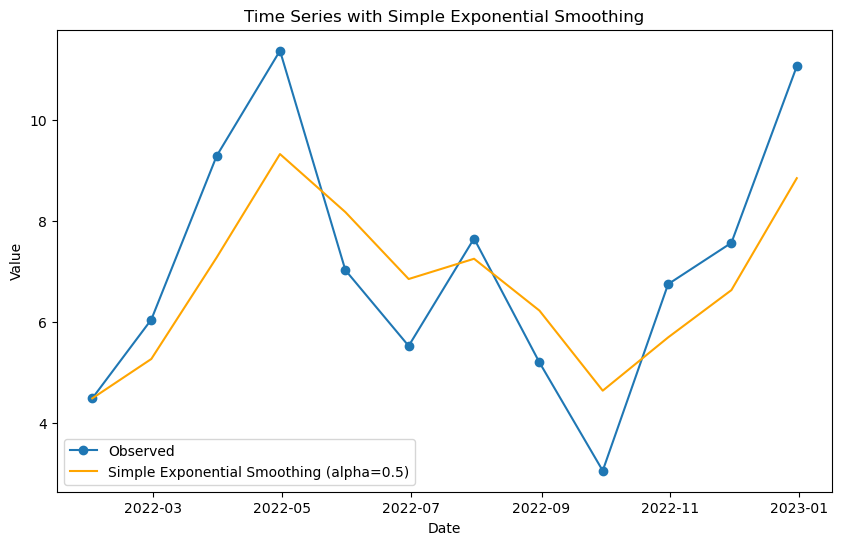

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming 'df' is your DataFrame with time index)
# df = pd.read_csv('your_dataset.csv', parse_dates=True, index_col='Date')

# Set the smoothing parameter (0 < alpha < 1)
alpha = 0.5  # You can adjust this value

# Calculate the simple exponential smoothing
df['SES'] = df['Observed'].ewm(alpha=alpha, adjust=False).mean()

# Plot the original time series and the simple exponential smoothing
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.plot(df.index, df['SES'], label=f'Simple Exponential Smoothing (alpha={alpha})', color='orange')
plt.title('Time Series with Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


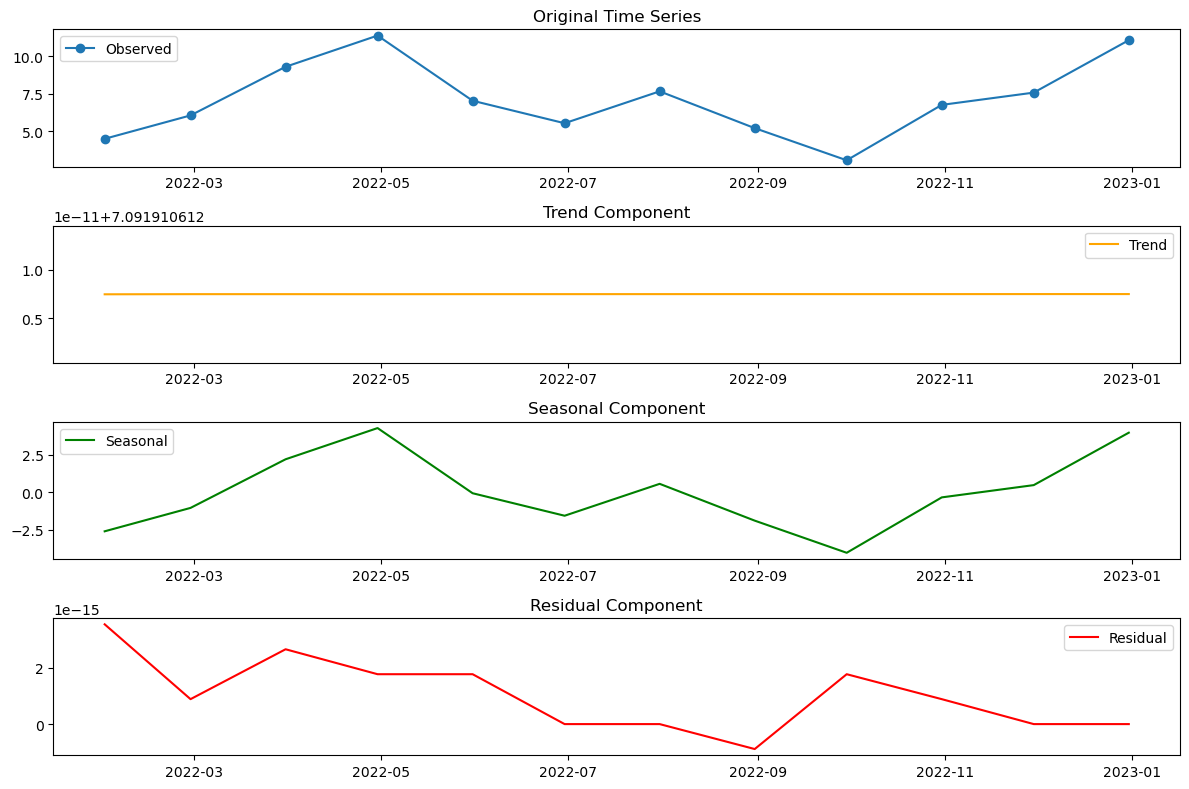

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset (assuming 'df' is your DataFrame with time index)
# df = pd.read_csv('your_dataset.csv', parse_dates=True, index_col='Date')

# Seasonal-Trend decomposition using LOESS (STL)
stl = sm.tsa.STL(df['Observed'], seasonal=13)  # Set the seasonal period (e.g., 13 for monthly data)
result = stl.fit()

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(df.index, trend, label='Trend', color='orange')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df.index, residual, label='Residual', color='red')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()

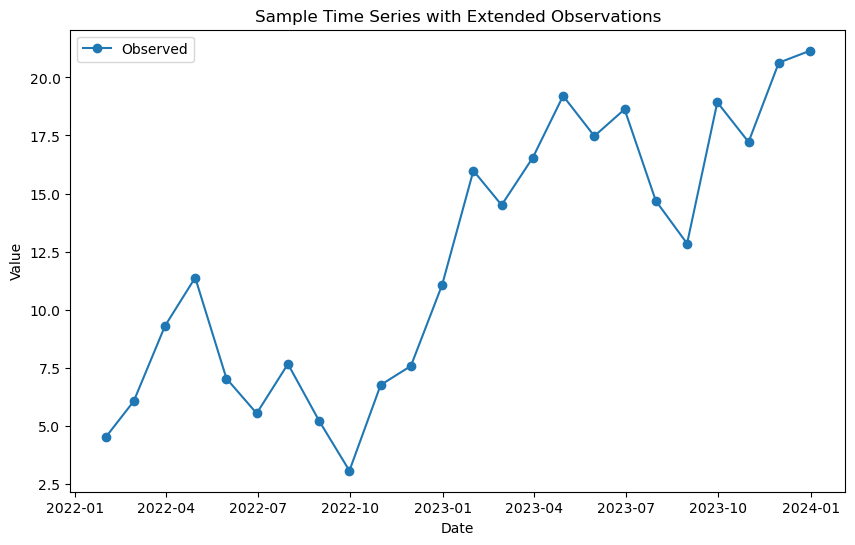

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a time index with more observations (e.g., monthly data for two years)
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='M')

# Create a trend component with a slight increase over time
trend = np.arange(1, len(date_rng) + 1)

# Create a seasonal component with a sinusoidal pattern
seasonality = 5 * np.sin(2 * np.pi * np.arange(1, len(date_rng) + 1) / 12)

# Create some random noise
noise = np.random.normal(loc=0, scale=2, size=len(date_rng))

# Combine the components to create the observed time series
observed_data = trend + seasonality + noise

# Create a DataFrame with the date index and observed data
df = pd.DataFrame(index=date_rng, data={'Observed': observed_data})

# Plot the observed time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.title('Sample Time Series with Extended Observations')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


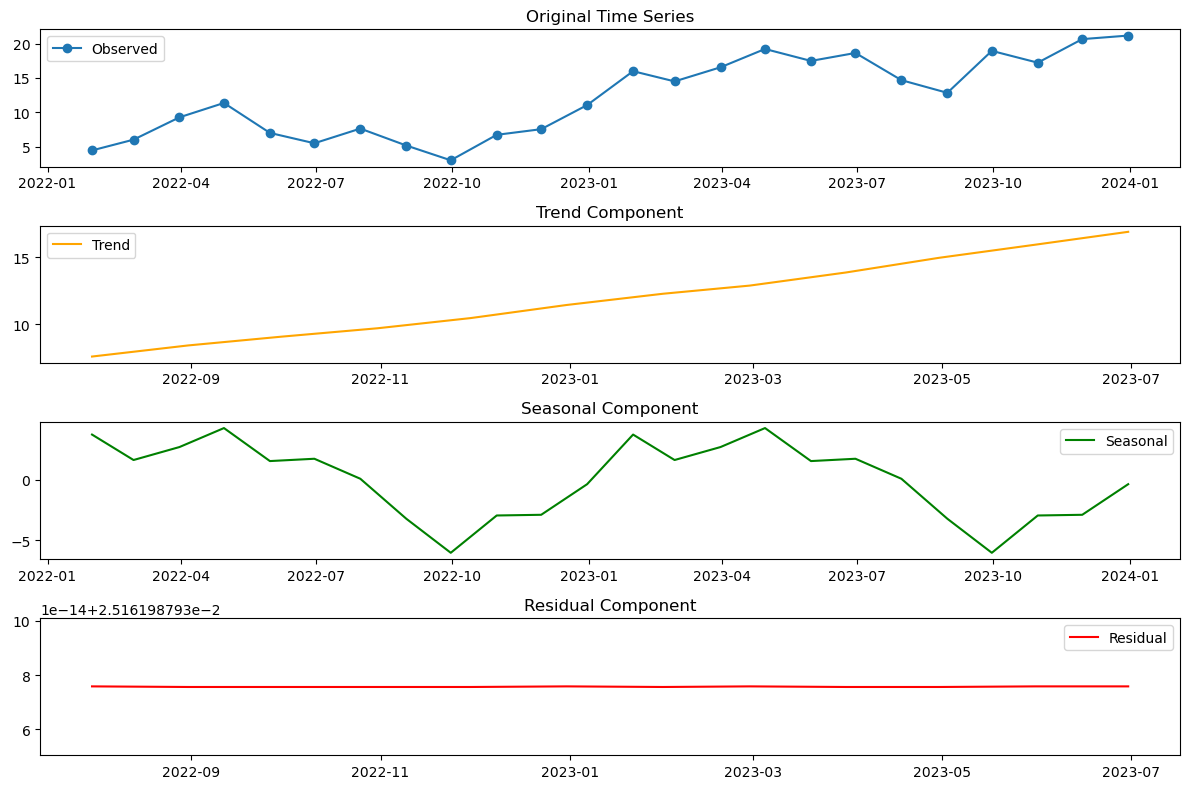

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset (assuming 'df' is your DataFrame with time index)
# df = pd.read_csv('your_dataset.csv', parse_dates=True, index_col='Date')

# Classical Seasonal Decomposition of Time Series (CSD)
result = sm.tsa.seasonal_decompose(df['Observed'], model='additive', period=12)  # Set the seasonal period (e.g., 12 for monthly data)

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(df.index, trend, label='Trend', color='orange')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df.index, residual, label='Residual', color='red')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()


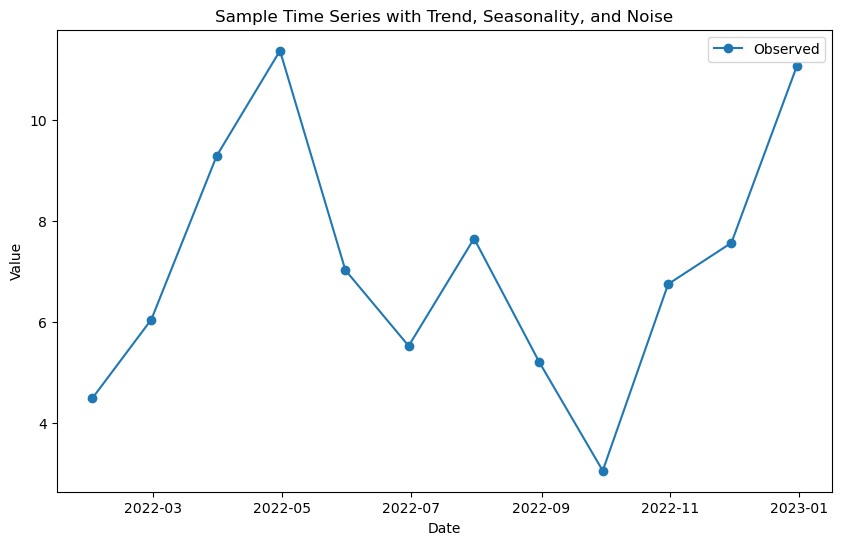

                               SARIMAX Results                                
Dep. Variable:               Observed   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -26.149
Date:                Sat, 13 Jan 2024   AIC                             58.297
Time:                        15:23:43   BIC                             59.491
Sample:                    01-31-2022   HQIC                            57.545
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4718      1.598     -0.295      0.768      -3.605       2.661
ma.L1          0.7611      1.177      0.646      0.518      -1.546       3.069
sigma2         6.6576      4.976      1.338      0.1

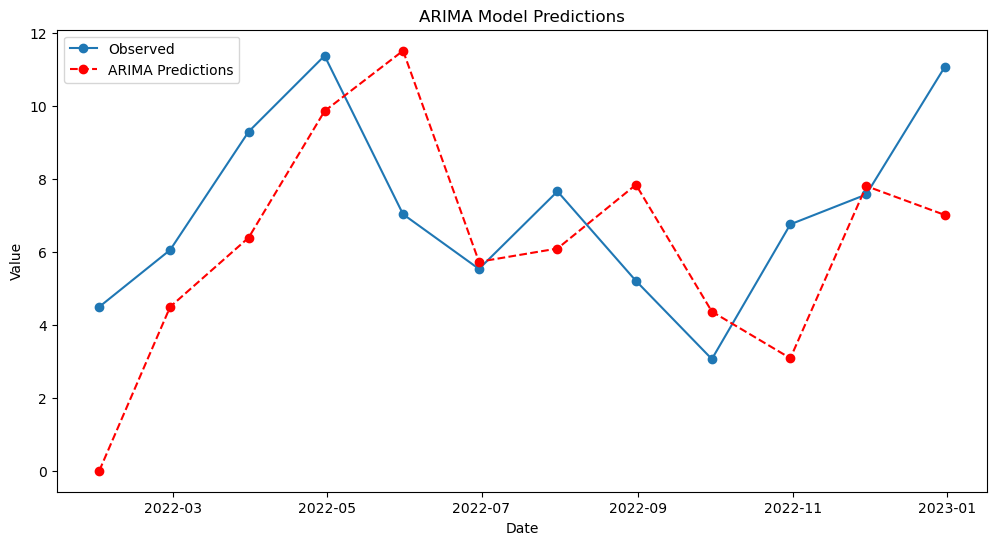

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a time index (e.g., monthly data for a year)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M')

# Create a trend component with a slight increase over time
trend = np.arange(1, len(date_rng) + 1)

# Create a seasonal component with a sinusoidal pattern
seasonality = 5 * np.sin(2 * np.pi * np.arange(1, len(date_rng) + 1) / 12)

# Create some random noise
noise = np.random.normal(loc=0, scale=2, size=len(date_rng))

# Combine the components to create the observed time series
observed_data = trend + seasonality + noise

# Create a DataFrame with the date index and observed data
df = pd.DataFrame(index=date_rng, data={'Observed': observed_data})

# Plot the observed time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.title('Sample Time Series with Trend, Seasonality, and Noise')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # You may need to adjust these parameters based on your data
model = ARIMA(df['Observed'], order=order)
result = model.fit()

# Print summary of the model
print(result.summary())

# Plot the observed time series and the ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.plot(df.index, result.predict(), label='ARIMA Predictions', color='red', linestyle='--', marker='o')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


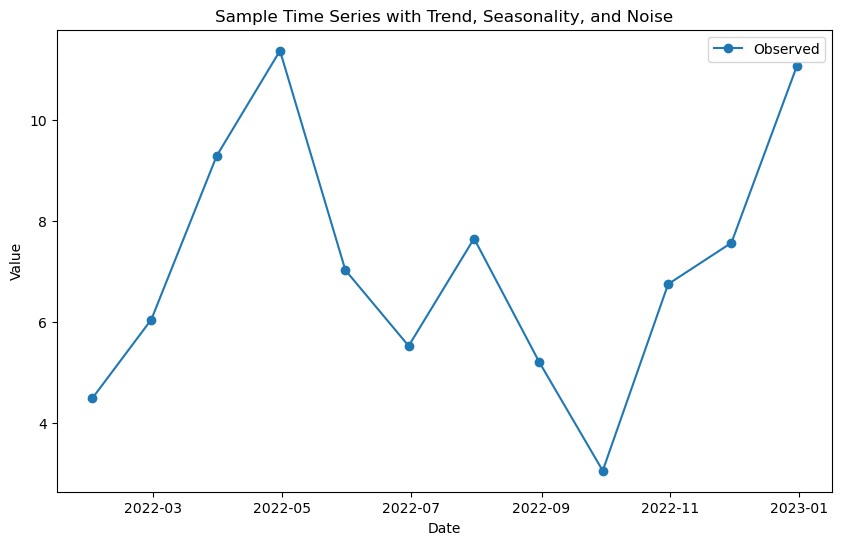

                                     SARIMAX Results                                      
Dep. Variable:                           Observed   No. Observations:                   12
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sat, 13 Jan 2024   AIC                             12.000
Time:                                    15:25:57   BIC                                nan
Sample:                                01-31-2022   HQIC                               nan
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1                  0         -0        nan        nan           0           0
ar.L1               0         -0   

c:\Users\Rober\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Rober\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Rober\Anaconda3\Lib\site-packages\statsmodels\tools\eval_measures.py:415: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:\Users\Rober\Anaconda3\Lib\site-packages\statsmodels\tools\eval_measures.py:440: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
c:\Users\Rober\Anaconda3\Lib\site-packa

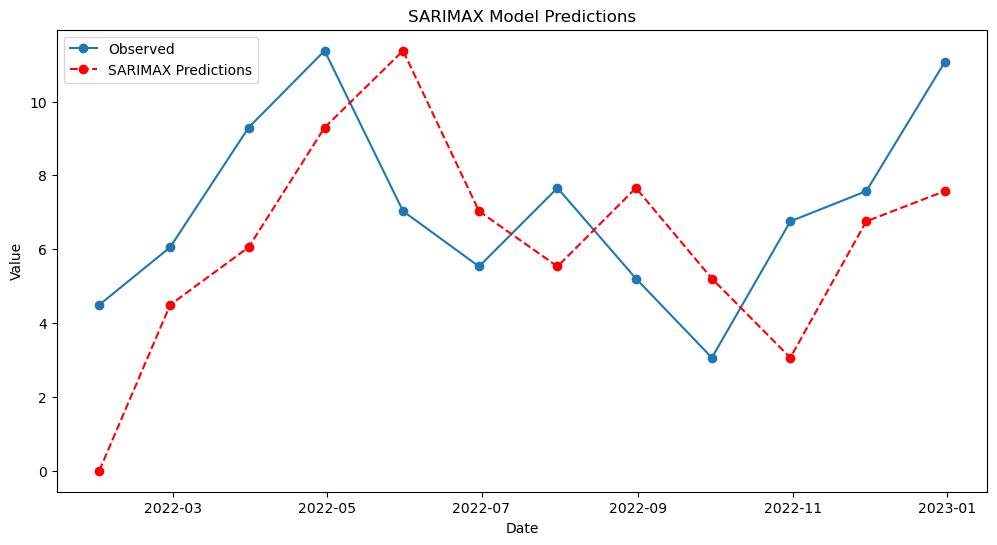

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a time index (e.g., monthly data for a year)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M')

# Create a trend component with a slight increase over time
trend = np.arange(1, len(date_rng) + 1)

# Create a seasonal component with a sinusoidal pattern
seasonality = 5 * np.sin(2 * np.pi * np.arange(1, len(date_rng) + 1) / 12)

# Create some random noise
noise = np.random.normal(loc=0, scale=2, size=len(date_rng))

# Combine the components to create the observed time series
observed_data = trend + seasonality + noise

# Create a DataFrame with the date index and observed data
df = pd.DataFrame(index=date_rng, data={'Observed': observed_data})

# Plot the observed time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.title('Sample Time Series with Trend, Seasonality, and Noise')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# SARIMAX model with exogenous variable (trend in this case)
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order
exog = trend.reshape(-1, 1)  # Reshape trend for the exogenous variable

model = SARIMAX(df['Observed'], order=order, seasonal_order=seasonal_order, exog=exog)
result = model.fit()

# Print summary of the model
print(result.summary())

# Plot the observed time series and the SARIMAX predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.plot(df.index, result.predict(exog=exog), label='SARIMAX Predictions', color='red', linestyle='--', marker='o')
plt.title('SARIMAX Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
